User Experience Analysis

In [87]:
import pandas as pd
from dbconnection import create_database_connection, read_data_into_dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans


In [88]:
engine = create_database_connection()
df=read_data_into_dataframe(engine, "xdr_data")

In [89]:
information_columns = [
    'MSISDN/Number',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Handset Type',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)',
]
numeric_info_columns = [
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]


In [90]:
empty_cell=df['Handset Type'].isnull().sum()
empty_cell


572

In [91]:
df_new = df[information_columns]
df_new_clean=df_new.dropna(subset=['Handset Type'])
df_new_clean

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,42.0,5.0,NaN,NaN,Samsung Galaxy A5 Sm-A520F,23.0,44.0
1,3.368185e+10,65.0,5.0,NaN,NaN,Samsung Galaxy J5 (Sm-J530),16.0,26.0
2,3.376063e+10,NaN,NaN,NaN,NaN,Samsung Galaxy A8 (2018),6.0,9.0
3,3.375034e+10,NaN,NaN,NaN,NaN,undefined,44.0,44.0
4,3.369980e+10,NaN,NaN,NaN,NaN,Samsung Sm-G390F,6.0,9.0
...,...,...,...,...,...,...,...,...
149995,3.366865e+10,313.0,9.0,16552848.0,162614.0,undefined,63420.0,1393.0
149996,3.365069e+10,32.0,0.0,NaN,NaN,Apple iPhone 8 Plus (A1897),52.0,65.0
149997,3.366345e+10,27.0,2.0,NaN,NaN,Apple iPhone Se (A1723),23.0,54.0
149998,3.362189e+10,43.0,6.0,NaN,NaN,Apple iPhone Xs (A2097),43.0,47.0


In [92]:
#identify and replace outliers in the 'numeric_info_columns' of the 'df_new_clean' DataFrame. 

lower_10th_percentile = df_new_clean[numeric_info_columns].quantile(0.01)
upper_10th_percentile = df_new_clean[numeric_info_columns].quantile(0.99)


for col in numeric_info_columns:
    outliers = (df_new_clean[col] < lower_10th_percentile[col]) | (df_new_clean[col] > upper_10th_percentile[col])
    if col == 'Avg Bearer TP DL (kbps)':
        df_new_clean.loc[outliers, col] = df_new_clean.loc[~outliers, col].mean()
df_new_clean

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,42.0,5.0,NaN,NaN,Samsung Galaxy A5 Sm-A520F,23.0,44.0
1,3.368185e+10,65.0,5.0,NaN,NaN,Samsung Galaxy J5 (Sm-J530),16.0,26.0
2,3.376063e+10,NaN,NaN,NaN,NaN,Samsung Galaxy A8 (2018),6.0,9.0
3,3.375034e+10,NaN,NaN,NaN,NaN,undefined,44.0,44.0
4,3.369980e+10,NaN,NaN,NaN,NaN,Samsung Sm-G390F,6.0,9.0
...,...,...,...,...,...,...,...,...
149995,3.366865e+10,313.0,9.0,16552848.0,162614.0,undefined,63420.0,1393.0
149996,3.365069e+10,32.0,0.0,NaN,NaN,Apple iPhone 8 Plus (A1897),52.0,65.0
149997,3.366345e+10,27.0,2.0,NaN,NaN,Apple iPhone Se (A1723),23.0,54.0
149998,3.362189e+10,43.0,6.0,NaN,NaN,Apple iPhone Xs (A2097),43.0,47.0


In [93]:
#filling missing valued in numeric informations with mean
df_clean_NaN = df_new_clean.copy()
df_clean_NaN[numeric_info_columns] = df_clean_NaN[numeric_info_columns].apply(lambda x: x.fillna(x.mean()))
df_clean_NaN

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,42.00000,5.00000,2.082609e+07,764055.136253,Samsung Galaxy A5 Sm-A520F,23.0,44.0
1,3.368185e+10,65.00000,5.00000,2.082609e+07,764055.136253,Samsung Galaxy J5 (Sm-J530),16.0,26.0
2,3.376063e+10,108.11037,17.67528,2.082609e+07,764055.136253,Samsung Galaxy A8 (2018),6.0,9.0
3,3.375034e+10,108.11037,17.67528,2.082609e+07,764055.136253,undefined,44.0,44.0
4,3.369980e+10,108.11037,17.67528,2.082609e+07,764055.136253,Samsung Sm-G390F,6.0,9.0
...,...,...,...,...,...,...,...,...
149995,3.366865e+10,313.00000,9.00000,1.655285e+07,162614.000000,undefined,63420.0,1393.0
149996,3.365069e+10,32.00000,0.00000,2.082609e+07,764055.136253,Apple iPhone 8 Plus (A1897),52.0,65.0
149997,3.366345e+10,27.00000,2.00000,2.082609e+07,764055.136253,Apple iPhone Se (A1723),23.0,54.0
149998,3.362189e+10,43.00000,6.00000,2.082609e+07,764055.136253,Apple iPhone Xs (A2097),43.0,47.0


In [94]:
#Calculate the sum of downlink and uplink for round-trip time, TCP retransmission volume and bearer throughput

df_clean_NaN['Sum RTT'] = df_clean_NaN['Avg RTT DL (ms)'] + df_clean_NaN['Avg RTT UL (ms)']
df_clean_NaN['Sum TCP Retrans. Vol (Bytes)'] = df_clean_NaN['TCP DL Retrans. Vol (Bytes)'] + df_clean_NaN['TCP UL Retrans. Vol (Bytes)']
df_clean_NaN['Sum Bearer TP'] = df_clean_NaN['Avg Bearer TP DL (kbps)'] + df_clean_NaN['Avg Bearer TP UL (kbps)']



df_clean_NaN

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Sum RTT,Sum TCP Retrans. Vol (Bytes),Sum Bearer TP
0,3.366496e+10,42.00000,5.00000,2.082609e+07,764055.136253,Samsung Galaxy A5 Sm-A520F,23.0,44.0,47.00000,2.159014e+07,67.0
1,3.368185e+10,65.00000,5.00000,2.082609e+07,764055.136253,Samsung Galaxy J5 (Sm-J530),16.0,26.0,70.00000,2.159014e+07,42.0
2,3.376063e+10,108.11037,17.67528,2.082609e+07,764055.136253,Samsung Galaxy A8 (2018),6.0,9.0,125.78565,2.159014e+07,15.0
3,3.375034e+10,108.11037,17.67528,2.082609e+07,764055.136253,undefined,44.0,44.0,125.78565,2.159014e+07,88.0
4,3.369980e+10,108.11037,17.67528,2.082609e+07,764055.136253,Samsung Sm-G390F,6.0,9.0,125.78565,2.159014e+07,15.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,3.366865e+10,313.00000,9.00000,1.655285e+07,162614.000000,undefined,63420.0,1393.0,322.00000,1.671546e+07,64813.0
149996,3.365069e+10,32.00000,0.00000,2.082609e+07,764055.136253,Apple iPhone 8 Plus (A1897),52.0,65.0,32.00000,2.159014e+07,117.0
149997,3.366345e+10,27.00000,2.00000,2.082609e+07,764055.136253,Apple iPhone Se (A1723),23.0,54.0,29.00000,2.159014e+07,77.0
149998,3.362189e+10,43.00000,6.00000,2.082609e+07,764055.136253,Apple iPhone Xs (A2097),43.0,47.0,49.00000,2.159014e+07,90.0


In [95]:
#Adjusting columns
analysis_columns = [
    'MSISDN/Number',
    'Handset Type',
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP'
]

numerical_analysis_columns  = [
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP'
]
df_analysis_columns = df_clean_NaN[analysis_columns]
df_analysis_columns

,MSISDN/Number,Handset Type,Sum RTT,Sum TCP Retrans. Vol (Bytes),Sum Bearer TP
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,47.00000,2.159014e+07,67.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),70.00000,2.159014e+07,42.0
2,3.376063e+10,Samsung Galaxy A8 (2018),125.78565,2.159014e+07,15.0
3,3.375034e+10,undefined,125.78565,2.159014e+07,88.0
4,3.369980e+10,Samsung Sm-G390F,125.78565,2.159014e+07,15.0
...,...,...,...,...,...
149995,3.366865e+10,undefined,322.00000,1.671546e+07,64813.0
149996,3.365069e+10,Apple iPhone 8 Plus (A1897),32.00000,2.159014e+07,117.0
149997,3.366345e+10,Apple iPhone Se (A1723),29.00000,2.159014e+07,77.0
149998,3.362189e+10,Apple iPhone Xs (A2097),49.00000,2.159014e+07,90.0


In [96]:
# Group by 'MSISDN/Number' and sum the values for each group
grouped_df = df_analysis_columns.groupby('MSISDN/Number')[numerical_analysis_columns].sum().reset_index()

# Display the grouped DataFrame
grouped_df

,MSISDN/Number,Sum RTT,Sum TCP Retrans. Vol (Bytes),Sum Bearer TP
0,3.360100e+10,46.00000,2.159014e+07,76.000000
1,3.360100e+10,31.00000,2.159014e+07,99.000000
2,3.360100e+10,125.78565,2.159014e+07,97.000000
3,3.360101e+10,84.00000,7.651211e+05,248.000000
4,3.360101e+10,119.00000,3.096098e+07,56844.000000
...,...,...,...,...
106851,3.379000e+10,52.00000,2.180450e+05,10365.000000
106852,3.379000e+10,40.00000,2.159014e+07,116.000000
106853,3.197021e+12,125.78565,2.159014e+07,12223.185579
106854,3.370000e+14,125.78565,2.159014e+07,33.000000


Compute & list 10 of the top, bottom and most frequent:


In [97]:
#TCP values in the dataset
top_10_tcp_values =grouped_df.nlargest(10, 'Sum TCP Retrans. Vol (Bytes)')
bottom_10_tcp_values = grouped_df.nsmallest(10, 'Sum TCP Retrans. Vol (Bytes)')
most_frequent_TCP = grouped_df['Sum TCP Retrans. Vol (Bytes)'].value_counts().idxmax()

print("Top 10 TCP Values:")
print(top_10_tcp_values[['MSISDN/Number', 'Sum TCP Retrans. Vol (Bytes)']])

print("\nBottom 10 TCP Values:")
print(bottom_10_tcp_values[['MSISDN/Number', 'Sum TCP Retrans. Vol (Bytes)']])
print("\nThe most frequent TCP value is:", most_frequent_TCP)

Top 10 TCP Values:
       MSISDN/Number  Sum TCP Retrans. Vol (Bytes)
66860   3.366773e+10                  8.354209e+09
34123   3.365908e+10                  7.941860e+09
42366   3.366098e+10                  7.374903e+09
94681   3.376128e+10                  6.043978e+09
98213   3.376264e+10                  5.879989e+09
25774   3.365066e+10                  5.593366e+09
51638   3.366318e+10                  5.566929e+09
70913   3.366905e+10                  5.195805e+09
99929   3.376357e+10                  5.179459e+09
31965   3.365864e+10                  5.165857e+09

Bottom 10 TCP Values:
        MSISDN/Number  Sum TCP Retrans. Vol (Bytes)
23472    3.365013e+10                          97.0
6359     3.361478e+10                         128.0
96977    3.376206e+10                         129.0
13546    3.362636e+10                         134.0
2177     3.360783e+10                         143.0
25863    3.365068e+10                         176.0
102198   3.376964e+10            

In [98]:
#RTT values in the dataset
top_10_RTT_values =grouped_df.nlargest(10, 'Sum RTT')
bottom_10_RTT_values = grouped_df.nsmallest(10, 'Sum RTT')
most_frequent_RTT = grouped_df['Sum RTT'].value_counts().idxmax()

print("Top 10 RTT Values:")
print(top_10_RTT_values[['MSISDN/Number', 'Sum RTT']])

print("\nBottom 10 RTT Values:")
print(bottom_10_RTT_values[['MSISDN/Number', 'Sum RTT']])
print("\nThe most frequent RTT value is:", most_frequent_RTT)

Top 10 RTT Values:
        MSISDN/Number  Sum RTT
47983    3.366232e+10  96924.0
41944    3.366087e+10  64670.0
80249    3.368369e+10  54848.0
85683    3.369855e+10  46021.0
96414    3.376181e+10  37084.0
70142    3.366879e+10  36304.0
93844    3.376094e+10  27278.0
1713     3.360679e+10  26300.0
74240    3.367182e+10  25715.0
104325   3.378187e+10  25388.0

Bottom 10 RTT Values:
       MSISDN/Number  Sum RTT
28878   3.365298e+10      0.0
44748   3.366158e+10      0.0
39066   3.366020e+10      2.0
83396   3.369505e+10      4.0
36039   3.365949e+10      5.0
69662   3.366862e+10      6.0
21980   3.364768e+10      8.0
3882    3.361085e+10      9.0
74434   3.367220e+10      9.0
17863   3.363468e+10     10.0

The most frequent RTT value is: 125.7856496432122


In [99]:
top_10_Throughput =grouped_df.nlargest(10, 'Sum Bearer TP')
bottom_10_Throughput = grouped_df.nsmallest(10, 'Sum Bearer TP')
most_frequent_Throughput = grouped_df['Sum Bearer TP'].value_counts().idxmax()

print("Top 10 Sum Bearer TP:")
print(top_10_Throughput[['MSISDN/Number', 'Sum Bearer TP']])

print("\nBottom 10 Sum Bearer TP:")
print(bottom_10_Throughput[['MSISDN/Number', 'Sum Bearer TP']])
print("\nThe most frequent Sum Bearer TP is:", most_frequent_Throughput)

Top 10 Sum Bearer TP:
        MSISDN/Number  Sum Bearer TP
36257    3.365955e+10  588527.371159
63021    3.366646e+10  524686.000000
86933    3.369894e+10  492358.000000
100319   3.376374e+10  468404.000000
32387    3.365873e+10  465453.000000
29539    3.365812e+10  461725.000000
98213    3.376264e+10  449680.185579
88115    3.369933e+10  445981.000000
46678    3.366201e+10  443978.000000
100522   3.376389e+10  442151.000000

Bottom 10 Sum Bearer TP:
       MSISDN/Number  Sum Bearer TP
59401   3.366528e+10            6.0
74398   3.367212e+10            6.0
37827   3.365991e+10            7.0
69579   3.366859e+10            7.0
82918   3.368911e+10            7.0
2989    3.360939e+10            8.0
6938    3.361569e+10            8.0
17016   3.363302e+10            8.0
31039   3.365843e+10            8.0
40535   3.366055e+10            8.0

The most frequent Sum Bearer TP is: 15.0


The distribution of the average throughput  per handset type 

In [100]:
avg_throughput_per_handset = df_analysis_columns.groupby('Handset Type')['Sum Bearer TP'].mean().reset_index()
print("Average Throughput per Handset Type:")
avg_throughput_per_handset

Average Throughput per Handset Type:


,Handset Type,Sum Bearer TP
0,A-Link Telecom I. Cubot A5,23510.000000
1,A-Link Telecom I. Cubot Note Plus,6699.000000
2,A-Link Telecom I. Cubot Note S,8937.000000
3,A-Link Telecom I. Cubot Nova,56217.000000
4,A-Link Telecom I. Cubot Power,69468.000000
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,6167.592790
1392,Zyxel Communicat. Lte7460,61956.000000
1393,Zyxel Communicat. Sbg3600,97351.000000
1394,Zyxel Communicat. Zyxel Wah7706,2173.000000


The average TCP retransmission view per handset type

In [101]:
avg_tcp_rtx_per_handset = df_analysis_columns.groupby('Handset Type')['Sum TCP Retrans. Vol (Bytes)'].mean().reset_index()
print("Distribution of Average TCP Retransmission per Handset Type:")
avg_tcp_rtx_per_handset

Distribution of Average TCP Retransmission per Handset Type:


,Handset Type,Sum TCP Retrans. Vol (Bytes)
0,A-Link Telecom I. Cubot A5,2.159014e+07
1,A-Link Telecom I. Cubot Note Plus,6.162130e+05
2,A-Link Telecom I. Cubot Note S,4.141173e+07
3,A-Link Telecom I. Cubot Nova,1.371700e+05
4,A-Link Telecom I. Cubot Power,8.041000e+03
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,1.117843e+07
1392,Zyxel Communicat. Lte7460,4.127655e+07
1393,Zyxel Communicat. Sbg3600,5.348694e+07
1394,Zyxel Communicat. Zyxel Wah7706,7.641711e+05


perform a k-means clustering (where k = 3) to segment users into groups of experiences 

In [102]:
#Experience matrix for clustering
experience_metrics = [
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP',
]

grouped_df[experience_metrics].isnull().sum()



Sum RTT                         0
Sum TCP Retrans. Vol (Bytes)    0
Sum Bearer TP                   0
dtype: int64

In [106]:
# df_cluster=grouped_df[experience_metrics]
# Standardize the data

df_cluster = grouped_df[experience_metrics].dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster characteristics
cluster_means = df_cluster.groupby('Cluster').mean()
print(cluster_means)


c:\Users\hp\.conda\envs\your_env_name\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


            Sum RTT  Sum TCP Retrans. Vol (Bytes)  Sum Bearer TP
Cluster                                                         
0        166.225700                  2.198426e+07    4782.613571
1        182.003464                  4.250532e+07   63615.366665
2        478.764946                  2.399222e+08  200164.718661


Visualization of clustered

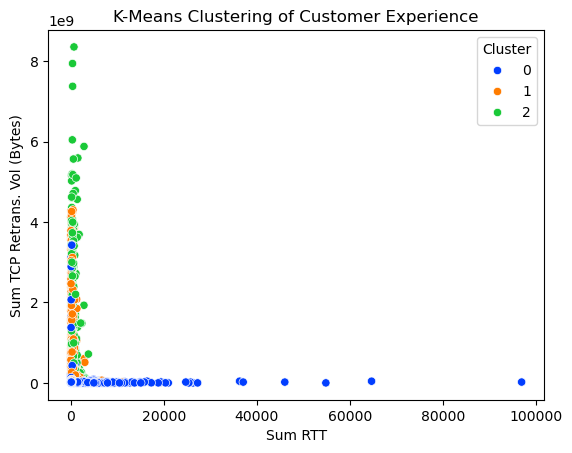

In [113]:
sns.scatterplot(x='Sum RTT', y='Sum TCP Retrans. Vol (Bytes)', hue='Cluster', data=df_cluster, palette='bright' )
plt.title('K-Means Clustering of Customer Experience')
plt.xlabel('Sum RTT')
plt.ylabel('Sum TCP Retrans. Vol (Bytes)')
plt.show()

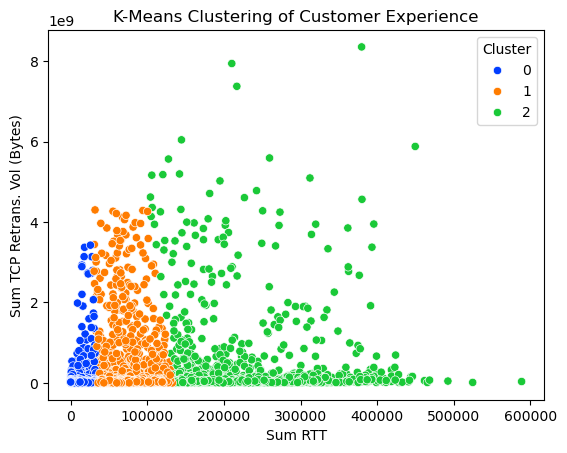

In [114]:
sns.scatterplot(x='Sum Bearer TP', y='Sum TCP Retrans. Vol (Bytes)', hue='Cluster', data=df_cluster, palette='bright' )
plt.title('K-Means Clustering of Customer Experience')
plt.xlabel('Sum Bearer TP')
plt.ylabel('Sum TCP Retrans. Vol (Bytes)')
plt.show()

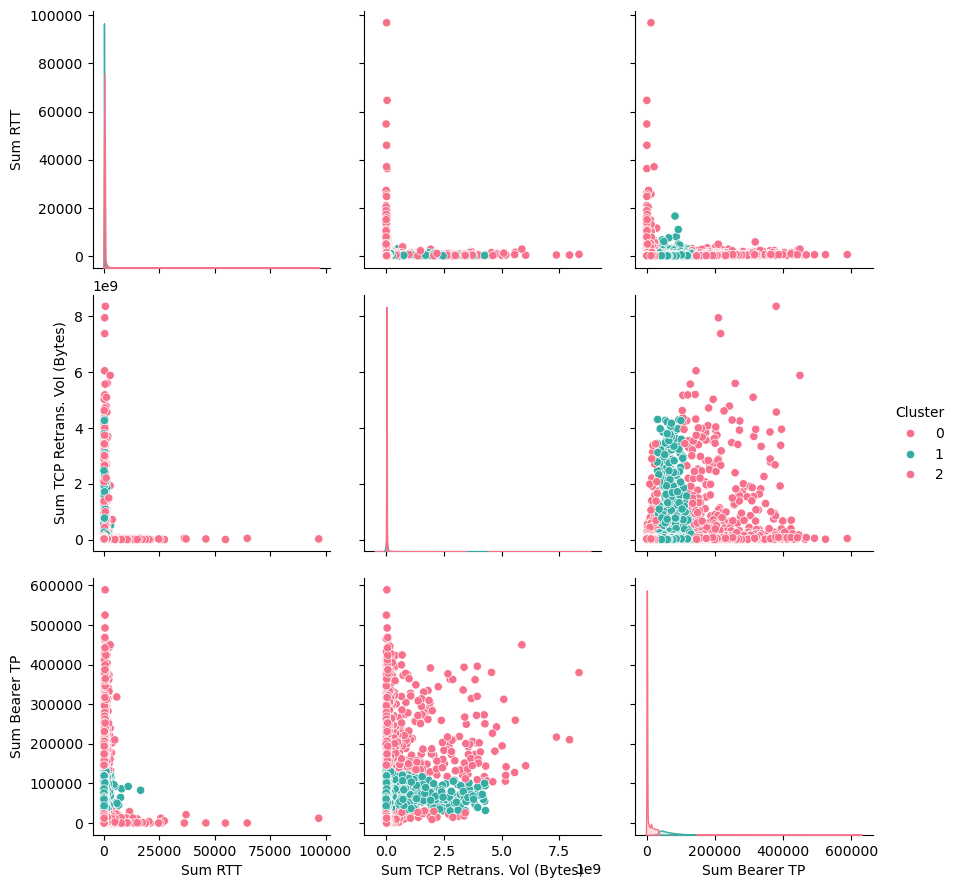

In [115]:
# Pairwise scatter plots for different pairs of experience metrics
sns.pairplot(df_cluster, hue="Cluster", palette="husl", height=3, diag_kind="kde")
plt.show()

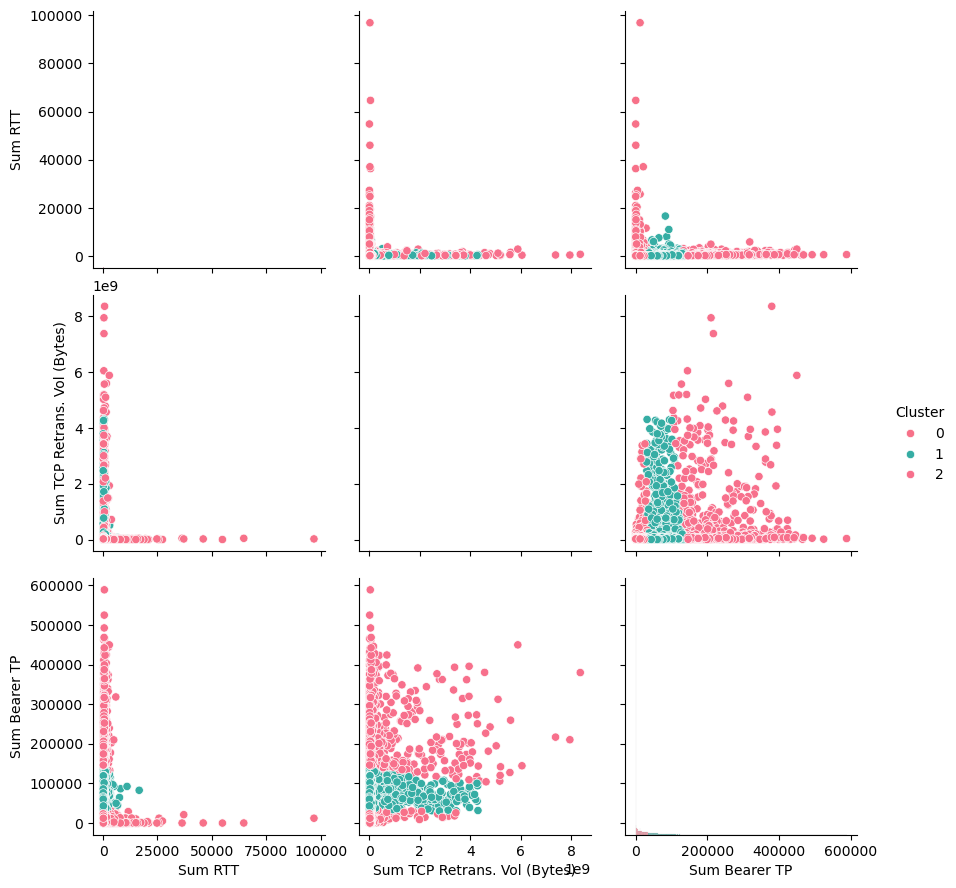

In [116]:
sns.pairplot(df_cluster, hue="Cluster", palette="husl", height=3, diag_kind="hist")
plt.show()